In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head(5)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
df.shape

(6704, 9)

In [4]:
# cheking the type of data
df.dtypes

Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [5]:
#checking the missing values of data
print('missing values of data is:')
print(df.isna().sum())

missing values of data is:
Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64


number of missing values is small and we better to drop this rows.

In [6]:
df.dropna(axis = 0 , inplace =True)


In [7]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

ok now we havnt missing value.

now we i want to drop unnamed column.

In [6]:
df.drop(columns = 'Unnamed: 0', axis = 1 , inplace = True)

In [7]:
#checking the unique values of data
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

از اونجایی که 191 تا شغل متفاوت داریم پس نمیتونیم همشونو دونه دونه بررسی کنیم .پس بهتره که گروه بندی بکنیمشون تا بررسیشون راحت باشه

## Grouping job titles

In [8]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [9]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

خب بعد از گروه بندی شغل ها ، حالا میخوایم سطح تحصیلات رو دسته بندی کنیم

In [10]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [11]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education) 

## descriptive statistics of data¶

In [12]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [13]:
df.head(8)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian
5,29.0,Male,Bachelors,Data Analyst/Scientist,2.0,55000.0,USA,Hispanic
6,42.0,Female,Masters,Manager/Director/VP,12.0,120000.0,USA,Asian
7,31.0,Male,Bachelors,Manager/Director/VP,4.0,80000.0,China,Korean


## EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Gender feature distribution')

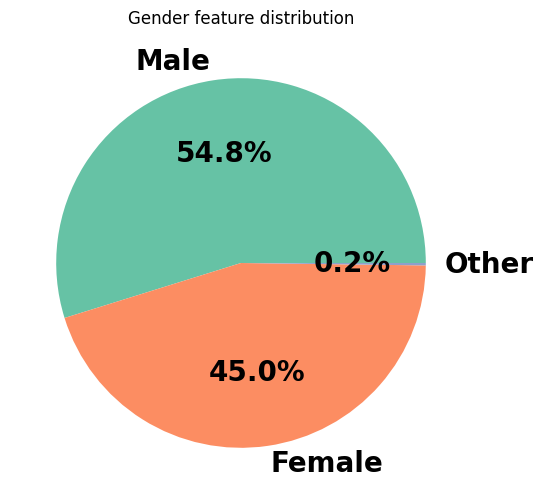

In [16]:
plt.figure(figsize = (10,6))
plt.pie(df['Gender'].value_counts() ,labels =df['Gender'].value_counts().keys(),autopct="%1.1f%%",
        textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title('Gender feature distribution')

از نمودار رسم شده مفهوم میگردد که درصد بالاتری از چامعه آماری و کارکنان ما مرد ها هستند سپس خانوم ها و درصد بسیار جزِِیی از امار را بقیه تشکیل میدهند

Text(0.5, 1.0, 'Age Distribution')

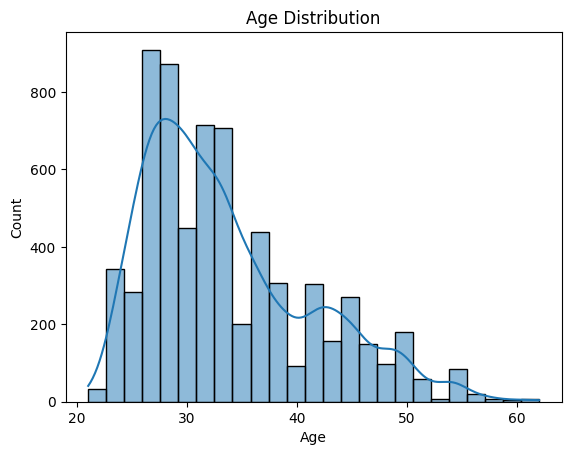

In [17]:
# Age
sns.histplot(data = df , x = 'Age' , bins = 25 , kde =True).set_title('Age Distribution')

 همونطور که مشاهده میکنید سن افراد در بازه 25 تا 35 سال میباشد

Text(0.5, 1.0, 'education level distribution')

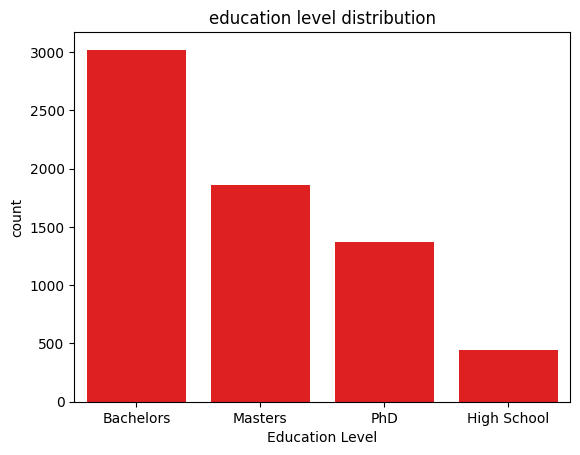

In [18]:
# نمودار سطح تحصیلات
sns.countplot(x = 'Education Level' , data = df , color = 'r' ).set_title('education level distribution')

نمودار بالا نشان میدهد که مدرک تحصیلی لیسانس بیشترین تعداد و سپس فوق لیسانس در جایگاه دوم قرار دارد که بیانگر این است که اکثریت تا مقطع کارشناسی ارشد تحصیل میکنند و مشغول کار مشوند.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

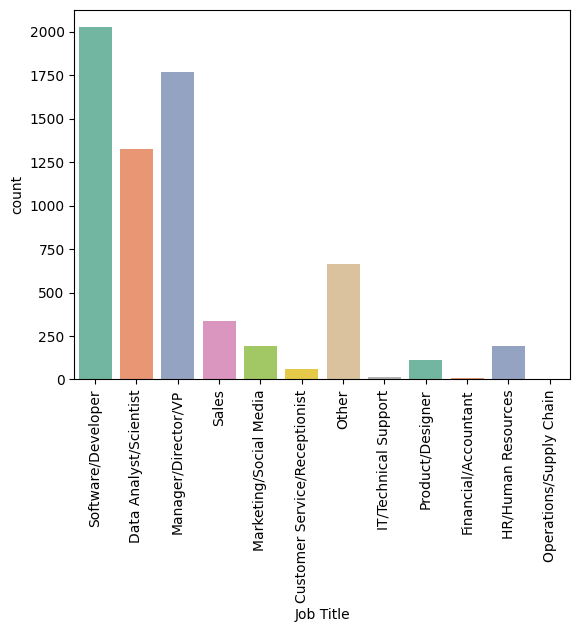

In [19]:
# عنوان شغلی
sns.countplot(x = 'Job Title' , data = df , palette = 'Set2')
plt.xticks(rotation = 90)

نمودار عنوان شغلی بیانگر این است که گروه نرم افزار و مدیریت بیشترین تعداد کارکنان و سپس گروه علم داده پر متقاضی ترین شغل های ما هستند با بیشتر از 70 درصد مشاغل که به این معنیست درامد در این سه گروه بیشتر از سایر گروه های شغلی است

<Axes: xlabel='Years of Experience', ylabel='Count'>

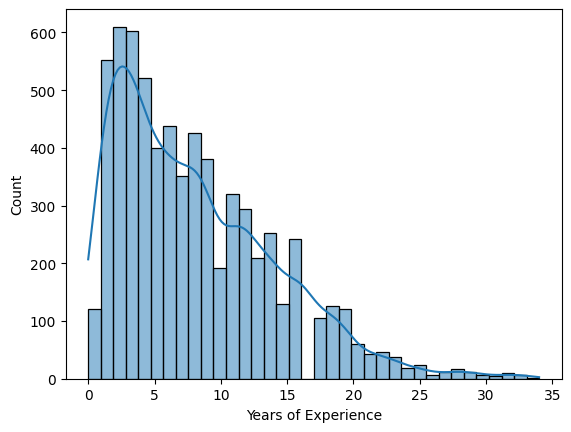

In [20]:
sns.histplot(x = 'Years of Experience' , data = df , kde = True)

نمودار سابقه کار بیانگر این است که اکثریت افراد مشغول کار با سابقه ای بین 0_7 سال هستند 

<Axes: xlabel='Country', ylabel='count'>

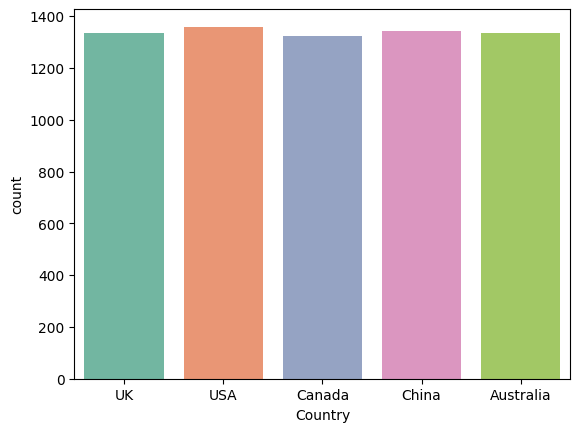

In [21]:
sns.countplot(x = 'Country' , data = df , palette = 'Set2')

سهم هر 5 کشور تقریبا برابر هست در این دیتاست که یکمی امریکا بیشتره نسبت به بقیه

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

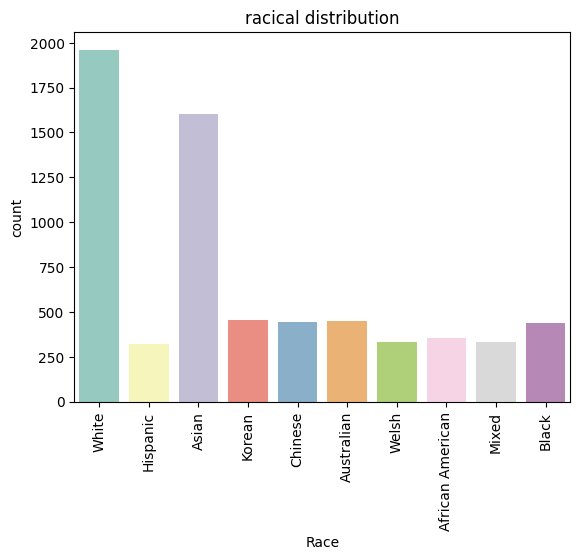

In [22]:
sns.countplot(x = 'Race' , data = df , palette = 'Set3').set_title('racical distribution')
plt.xticks(rotation = 90)

نمودار نژآد نشاندهنده این است که اکثر افراد دیتاست ما سفید پوست و اسیایی هستند بعد از این دو کره ای ،چینی ها و استرالیایی ها و سیاه پوستان هستند که به طور کلی بیانگر این است که اسیایی ها و اکثرا شرق اسیا نقش زیادی دارند 

خب حالا میخوایم فیچر های مختلف رو با فیچر هدفمون ترکیب کنیم تا اطلاعات مفیدی رو ازش کسب کنیم

## Age VS Salary

Text(0.5, 1.0, 'Age VS Salary')

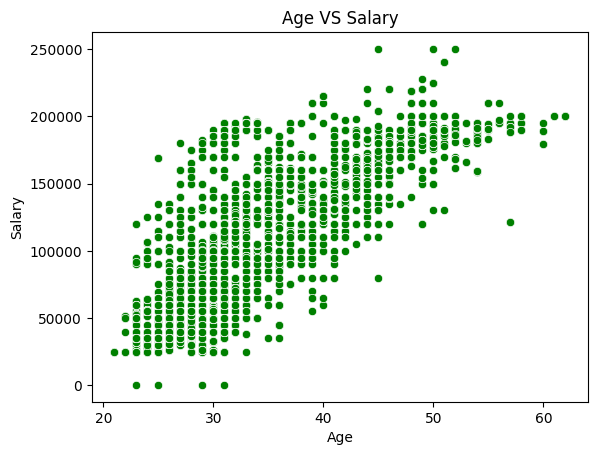

In [23]:
sns.scatterplot(x = 'Age' , y = 'Salary' , data = df , color = 'g').set_title('Age VS Salary')

از نمودار بالا استنباط میشود: با افزایش سن و تجربه حقوق افراد بالاتر میرود و حقوق افراد همسن مشابه یکدیگرند که بیان میکند سن فاکتور اساسی برای تعیین حقوق نیست و معیار های دیگری وجود دارند

## Gender VS Salary

Text(0.5, 1.0, 'gender vs salary')

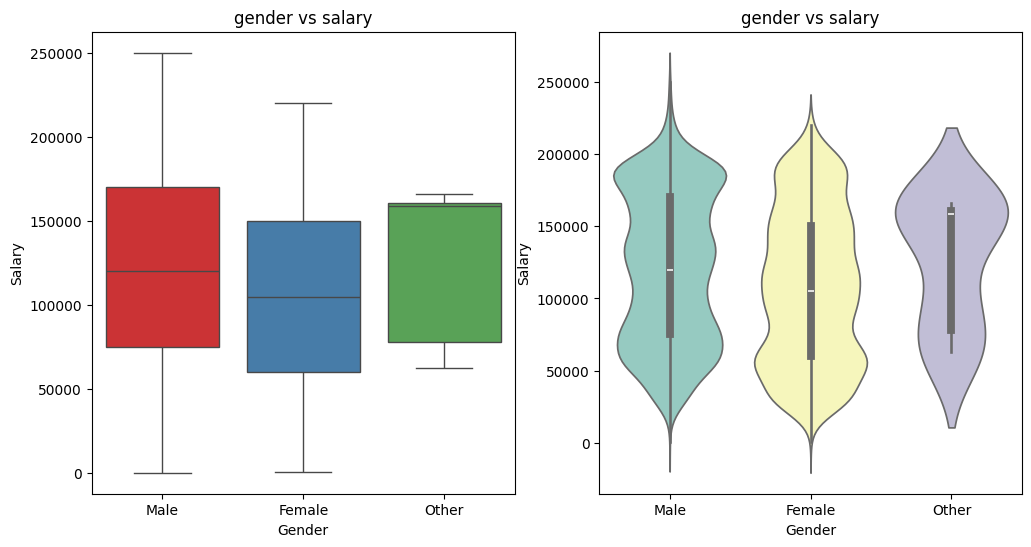

In [24]:
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 6))
sns.boxplot( x = 'Gender' , y = 'Salary' , data = df , ax = ax[0] , palette = 'Set1').set_title('gender vs salary')
sns.violinplot( x = 'Gender' , y = 'Salary' , data = df , ax = ax[1] , palette = 'Set3').set_title('gender vs salary')

نمودار جعبه ای نشان دهنده: حقوق اقایان از صفر تا 250000 دلار و خانم ها بین 0 تا 210000 دلار هستش که اکثریت و میانگین حقوق دریافتی اقایان بین 80 تا 170 هزارتا ومیانه دریافتی 107هزارتا و خانم ها بین 70 تا150 هزارتا و میانه دریافتیشون 100 هزارتا هستش.گروه چنسیت نامعلوم نیز که خیلی کم هستند به طور میانگین بین 80تا 160 هزار تا حوق دریافت میکنن و میانه بالاتری نزدیک به 150 هزار دلار که بسیار بالاتر از مردان و خانم ها هستش 
نمودار ویالونی ما که برای نمایش چزییات و تمرکز بر میزان حقوق هستش نشان میدهد که اقایان در سه طیف 60 و 140 و 170 هزارتا بیشترین تعداد را دارند .خانم ها اکثرا مبلغی حدود 60 هزارتا و گروه نا مشخص جنسیتی اکثرا 160 هزار تا به لحاظ تعداد جمعیتی حقوق دریافت میکنند

## Education vs Salary

Text(0.5, 1.0, 'Education vs salary')

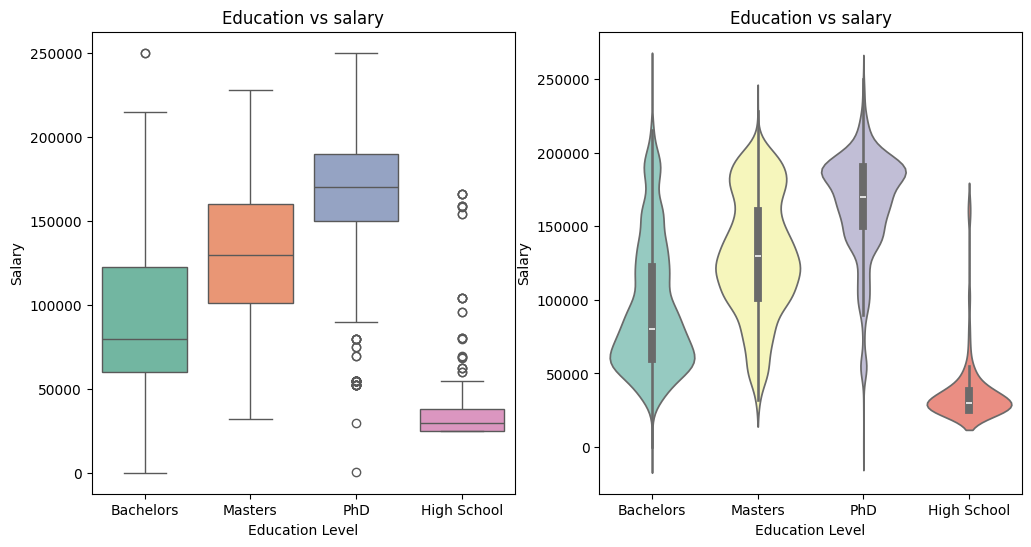

In [25]:
fig , ax = plt.subplots(1 , 2 , figsize = (12 , 6))
sns.boxplot( x = 'Education Level' , y = 'Salary' , data = df , ax = ax[0] , palette = 'Set2').set_title('Education vs salary')
sns.violinplot( x = 'Education Level' , y = 'Salary' , data = df , ax = ax[1] , palette = 'Set3').set_title('Education vs salary')

نمودار سطح تحصیلات با میزان دریافت حقوق بیانگر این است که هرجه افراد دارای مدرک بالاتری باشند حقوق دریافتی نیز بیشتر است به گونه ای که  افراد دارای لیسانس با میانگین 80 هزار تا و فوق لیسانس با 130 هزار و دکتری با بیشتر از 160 هزار دلار در سال حقوق دریافت میکنند 
کسانی که سطح تحصیلی پایینی مثل دبیرستان دارند با میانگین کمتر از 50 هزار دلار جزو کم درامد ترین افراد در این دیتاست هستند.


## عنوان شغلی و میزان حقوق

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

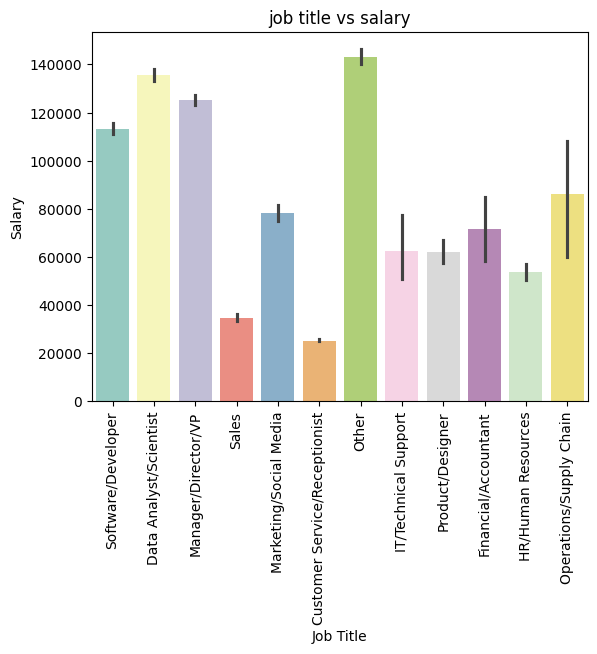

In [26]:
sns.barplot(x = 'Job Title' , y = 'Salary' , data = df , palette = 'Set3').set_title('job title vs salary')
plt.xticks(rotation = 90)

خب این نمودار برخلاف انچه در قبل بیان  کردیم نشان میدهد که مشاغلی مثل زنجیره تامین و مالی با درامد سالانه بالایی هستند هرچند در آمار ما بسیار کم وجود داشتند و دسته غیره با بالاترین میزان دریافتی در صدر جدول ما قرار دارد.اما همان طور که مشاهده میشود دسته های نرم افزار ، دیتا و مدیریت همچنان جزو بالاترین دریافتی های ما هستند.

## تاثیر سابقه کار بر میزان حقوق

Text(0.5, 1.0, 'experience vs salary ')

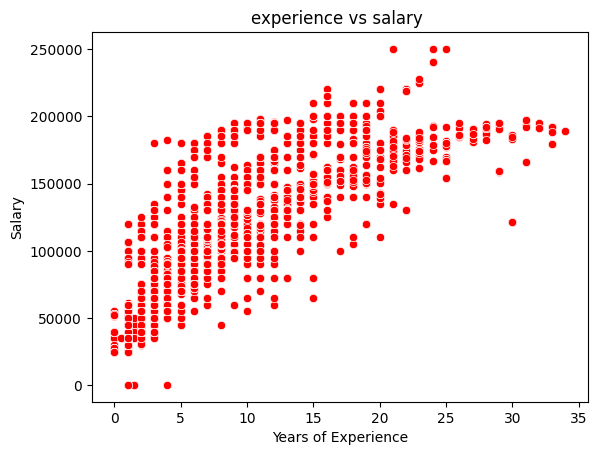

In [27]:
sns.scatterplot(x = 'Years of Experience' , y = 'Salary' , data = df , color = 'r').set_title('experience vs salary ')

این نمودار بیانگر این است که تا مرز20 سال سابقه کار روند صعودی است و شاغلان با افزایش تجربه کاری حقوق بیشتری دریافت میکنند ولی بعد از 20 به هر دلیلی از جمله فرسودگی روند صعودی رو طی نمیکنند

## ادامه پیش پردازش

In [28]:
df.head(8)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian
5,29.0,Male,Bachelors,Data Analyst/Scientist,2.0,55000.0,USA,Hispanic
6,42.0,Female,Masters,Manager/Director/VP,12.0,120000.0,USA,Asian
7,31.0,Male,Bachelors,Manager/Director/VP,4.0,80000.0,China,Korean


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricals = ['Education Level' , 'Job Title' , 'Country' ,'Gender', 'Race']

for i in categoricals:
    le.fit(df[i])
    df[i] =le.transform(df[i])
    print(i , df[i].unique())

Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Country [3 4 1 2 0]
Gender [1 0 2]
Race [9 5 1 6 4 2 8 0 7 3]


In [30]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1,0,11,5.0,90000.0,3,9
1,28.0,0,2,1,3.0,65000.0,4,5
2,45.0,1,3,5,15.0,150000.0,1,9
3,36.0,0,0,10,7.0,60000.0,4,5
4,52.0,1,2,5,20.0,200000.0,4,1


## Normalization

In [31]:
# normalization the continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age' , 'Years of Experience' , 'Salary']] = scaler.fit_transform(df[['Age' , 'Years of Experience' , 'Salary']])
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


## Corealtion Matrix Heatmap

<Axes: >

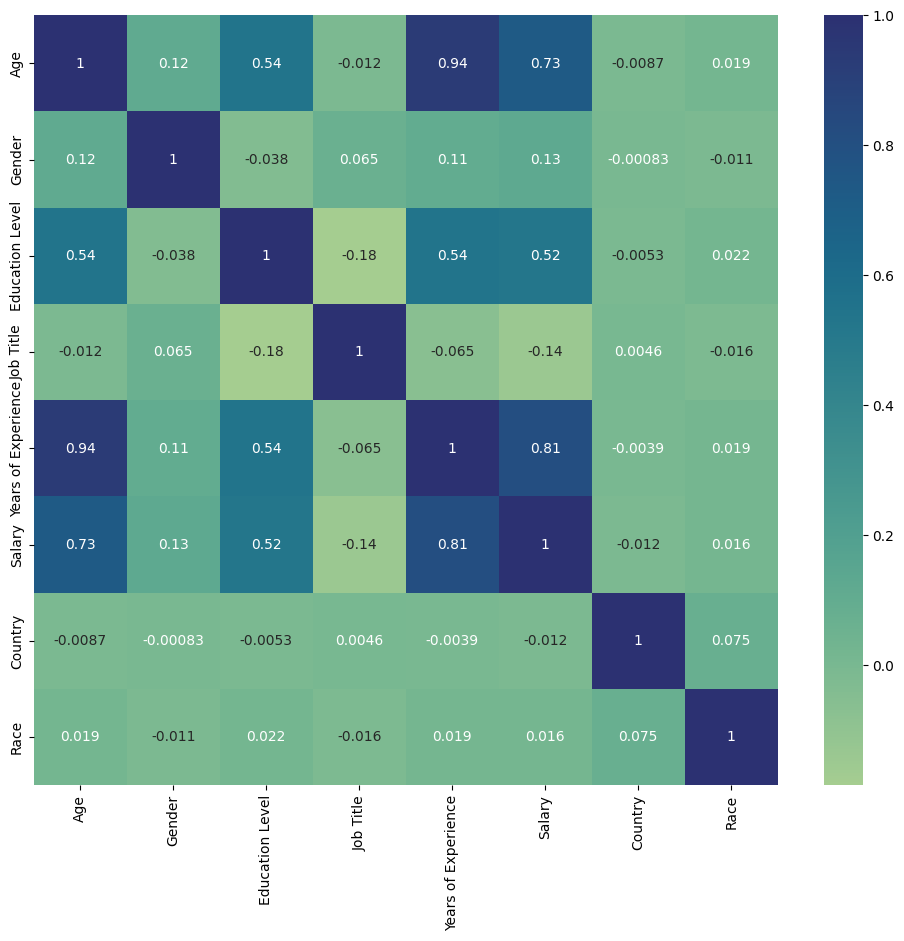

In [32]:
matrix = df.corr(method = 'pearson' , numeric_only=True)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(matrix , annot = True , cmap = 'crest')

## Train Test Split

In [33]:
X = df.drop(columns = 'Salary')
y = df['Salary']
x_train ,x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(5358, 7) (5358,)
(1340, 7) (1340,)


## Model Selection

In [34]:
# decition tree
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

In [35]:
#hyper parameter tuning
# defining the parameters for gridsearch
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating gridsearch object
grid_search = GridSearchCV(dtree , parameters , cv = 5 , scoring='neg_mean_squared_error',n_jobs=-1)

#fit the gridsearch object to the training data
grid_search.fit(x_train ,y_train)

# print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


ساختن مدل با بهترین پارامتر ها

In [36]:
dtree = DecisionTreeRegressor(max_depth= 10, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 6 , random_state = 0)
# fitting model with best parameters
dtree.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [37]:
dtree.score(x_train ,y_train)

0.9200464474810328

In [38]:
d_pred = dtree.predict(x_test)
d_pred

array([ 1.53242311,  0.27460876, -1.34182268, ..., -0.88788403,
        1.36463085,  0.39073627])

## Evaluating Decision Tree Model

In [39]:
dft = pd.DataFrame({'Actual' : y_test , 'predicted' : d_pred})
dft.reset_index(drop = True , inplace = True)
dft.head(9)

,Actual,predicted
0,1.604042,1.532423
1,0.277930,0.274609
2,-0.953461,-1.341823
3,0.751541,-0.013524
4,-1.142906,-1.076170
5,0.656819,0.936868
6,-1.237628,-0.006238
7,0.846264,0.587024
8,-1.711240,-1.711240


<Axes: xlabel='predicted', ylabel='Density'>

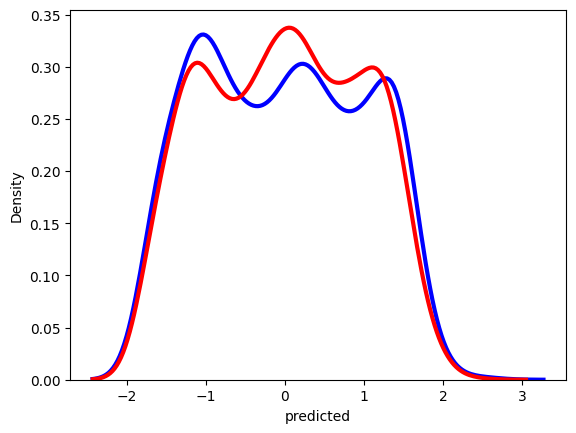

In [42]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.891015540945606
Mean Squared Error:  0.11189189657522267
Mean Absolute Error:  0.21674883991028354
RMSE: 0.3345024612394095


خب دقت مدل درخت تصمیم ما 89 درصد است که مقدار قابل قبولی برای ماست.با اندکی تغییر در هایپرپارامتر ها میتوانیم به مقادیر بیشتری نیز دستیابیم.

## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [46]:
# training the model 
rfg.fit(x_train , y_train)

RandomForestRegressor()

In [47]:
# training acuracy
rfg.score(x_train , y_train)

0.9870412111345522

In [48]:
# predicting salary of rmployee
r_pred = rfg.predict(x_test)

## Evaluating Random Forest Model

In [53]:
dfr = pd.DataFrame({'Actual' : y_test , 'predicted' : r_pred})
dfr.reset_index(drop = True , inplace = True)
dfr.head()

,Actual,predicted
0,1.604042,1.580362
1,0.277930,0.290254
2,-0.953461,-1.304084
3,0.751541,0.311320
4,-1.142906,-1.137764


<Axes: xlabel='predicted', ylabel='Density'>

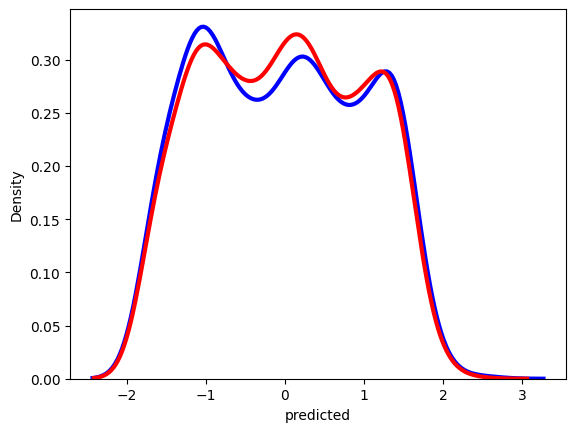

In [54]:
ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dfr['predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9566240230228082
Mean Squared Error:  0.04453314143954085
Mean Absolute Error:  0.107426449579646
RMSE: 0.21102876922244715


مدل دوم به ما  دقت 95 درصد رو داد که خیلی بهتر از مدل قبلیست 